# Problem statement:-2]

In [1]:
# classify the Size_Categorie using SVM

# month	month of the year: 'jan' to 'dec'
# day	day of the week: 'mon' to 'sun'
# FFMC	FFMC index from the FWI system: 18.7 to 96.20
# DMC	DMC index from the FWI system: 1.1 to 291.3
# DC	DC index from the FWI system: 7.9 to 860.6
# ISI	ISI index from the FWI system: 0.0 to 56.10
# temp	temperature in Celsius degrees: 2.2 to 33.30
# RH	relative humidity in %: 15.0 to 100
# wind	wind speed in km/h: 0.40 to 9.40
# rain	outside rain in mm/m2 : 0.0 to 6.4
# Size_Categorie 	the burned area of the forest ( Small , Large)

In [23]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("forestfires.csv")
df.shape

(517, 31)

In [4]:
df["size_category"].unique()

array(['small', 'large'], dtype=object)

In [5]:
X=df.iloc[:,2:10]
y1=df["size_category"]
X.head()



,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
yl=LabelEncoder()
yl.fit(y1)
y=yl.transform(y1)

In [8]:
y=pd.DataFrame(y,columns=["size_category"])
y.head()

,size_category
0,1
1,1
2,1
3,1
4,1


In [9]:
y["size_category"].value_counts()


1    378
0    139
Name: size_category, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((361, 8), (156, 8), (361, 1), (156, 1))

# Running SVM with default hyperparameter

In [12]:
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))

accuracy_score: 70.51282051282051
[[  0  46]
 [  0 110]]


In [13]:
model=SVC(kernel="poly")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))

accuracy_score: 70.51282051282051
[[  0  46]
 [  0 110]]


In [14]:
model=SVC(kernel="linear")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))

accuracy_score: 70.51282051282051
[[  0  46]
 [  0 110]]


# Performing K-fold cross validation with different kernels

In [25]:
svc=SVC()
kmodel=cross_val_score(svc,X,y,cv=10,scoring='accuracy')
print(kmodel)
print(kmodel.mean())

[0.73076923 0.73076923 0.73076923 0.73076923 0.73076923 0.73076923
 0.73076923 0.74509804 0.7254902  0.7254902 ]
0.7311463046757165


In [26]:
svc=SVC(kernel="poly")
kmodel=cross_val_score(svc,X,y,cv=10,scoring='accuracy')
print(kmodel)
print(kmodel.mean())

[0.73076923 0.73076923 0.73076923 0.73076923 0.73076923 0.73076923
 0.73076923 0.74509804 0.7254902  0.7254902 ]
0.7311463046757165


In [29]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165, 0.7311463046757165,

Text(0, 0.5, 'Cross-Validated Accuracy')

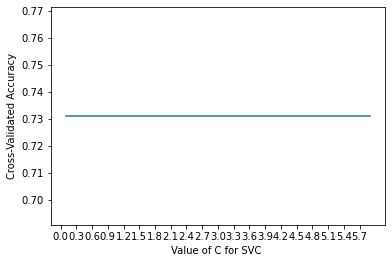

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# GridsearchCV

In [15]:
clf=SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [16]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}, 0.7424174174174174)

In [17]:
clf=SVC(C=15,gamma=0.5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [18]:
acc=accuracy_score(y_test,y_pred)*100

In [19]:
acc

70.51282051282051

In [20]:
confusion_matrix(y_test,y_pred)

array([[  4,  42],
       [  4, 106]], dtype=int64)

In [21]:
X_test.shape

(156, 8)